# Analysis of estimated health prices

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import csv

## Estimated health prices

In [2]:
# All countries: Administrative costs
countries = ['de','dk','fr','it','nl','se','sp','us']
euro = ['de','dk','fr','it','nl','se','sp']
stats = ['price','iota','hosp']
table = pd.DataFrame(index=countries,columns=stats)

In [3]:
# European Countries and health market institutions
statd  = ['price','comp','regu','quali','DemManag','pay']
tabled = pd.DataFrame(index=euro,columns=statd) #countries[0:7]

In [4]:
df = pd.read_pickle('../estimation/output/params_ref_us.pkl')
pars = df.loc[:,'value'].to_frame()
pars.columns = ['us']
for c in countries:
    df = pd.read_pickle('../estimation/output/params_ref_'+c+'.pkl')
    pars[c] = df.loc[:,'value']
print(pars)

                us        de        dk        fr        it        nl  \
name                                                                   
sigma     2.097183  2.097183  2.097183  2.097183  2.097183  2.097183   
beta      0.970000  0.970000  0.970000  0.970000  0.970000  0.970000   
phi       0.304140  0.304140  0.304140  0.304140  0.304140  0.304140   
psi       0.168902  0.168902  0.168902  0.168902  0.168902  0.168902   
delta_h1 -0.967380 -1.296156 -1.601068 -1.094451 -0.715889 -1.264525   
delta_h2  3.487244  3.953905  4.273184  3.697940  3.867593  3.998342   
eta       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
tfp       1.000000  1.008961  1.255176  0.923597  0.638877  1.009820   
price     1.000000  0.846861  0.887615  0.614844  0.712935  0.698165   
risk      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                se        sp  
name                          
sigma     2.097183  2.097183  
beta      0.970000  0.970000  
phi       0

In [5]:
price_health = pars.loc['price',:]
table.loc[:,'price']= price_health

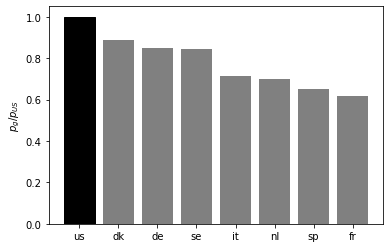

In [6]:
tablep = table.sort_values('price',ascending=False)
plt.figure()
b = plt.bar(tablep.index,tablep['price'],color='grey')
b[0].set_color('black')
plt.ylabel('$p_g/p_{US}$')
plt.show()

In [7]:
AdmiCostH = np.array([ 9.00, np.nan, 8.77, np.nan, 10.85, np.nan, np.nan, 15.51]) 
table.loc[:,'hosp']= AdmiCostH/AdmiCostH[-1]

In [8]:
from scipy import stats
slopeH, interceptH, r_valueH, p_valueH, std_errH = stats.linregress(table.loc[['de','fr','nl','us'],'price'],table.loc[['de','fr','nl','us'],'hosp'])
print("slope: %f    intercept: %f   R-squared: %f" % (slopeH, interceptH,r_valueH**2))


slope: 0.923157    intercept: -0.017949   R-squared: 0.604215


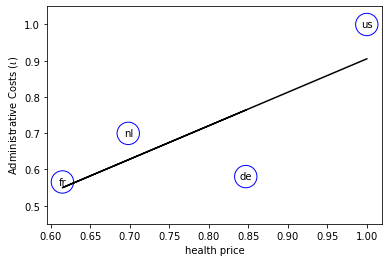

In [9]:
plt.figure()
plt.scatter(table.loc[:,'price'],table.loc[:,'hosp'],facecolors='none', edgecolors='b',s=500.0)
plt.plot(table.loc[['de','fr','nl','us'],'price'], interceptH + slopeH*table.loc[['de','fr','nl','us'],'price'], 'k')
plt.ylim(0.45,1.05)
plt.ylabel('Administrative Costs ($\iota$)')
plt.xlabel('health price')
for x,y,z in zip(table.loc[:,'price'],table.loc[:,'hosp'],countries):
    plt.annotate(z,xy=(x, y),horizontalalignment='center', verticalalignment='center')


## Health marlet institutions: European countries

In [10]:
typeReg = ['Physician payment',
'Hospital payment',
'Incentives for quality',
'Choice among providers',
'User choice of insurer',
'Lever',
'Regulation of physician supply',
'Regulation of capital investment',
'Regulation of price for physician services',
'Regulation of price for hospital services',
'Regulation of pharmaceutical price',
'Regulation of prices charged to third-party',
'Stringency of budget constraint',
'Control of volume',
'Gatekeeping',
'Depth of basic insurance',
'Definition of benefit basket',
'Public health objectives',
'Use of health technology assessment',
'Degree of decentralisation']

In [11]:
RegInd = np.array([
[4.5, 5.0, 0.0, 5.3, 6.0, 5.0, 3.6, 4.0, 3.0, 3.0, 1.0, 3.7, 2.0, 2.0, 3.0, 5.6, 4.0, 0.1, 3.6, 1.5],
[2.5, 1.0, 0.5, 2.0, 1.0, 0.0, 4.8, 4.0, 4.0, 5.0, 1.0, 4.0, 2.0, 1.7, 6.0, 5.3, 2.5, 2.4, 6.0, 2.3],
[4.5, 5.0, 0.5, 6.0, 2.0, 0.3, 4.8, 4.0, 4.0, 3.0, 5.0, 5.0, 2.0, 1.7, 3.0, 5.2, 5.0, 5.4, 4.0, 0.0],
[1.0, 5.0, 1.0, 6.0, 0.0, 0.0, 4.8, 6.0, 3.0, 5.0, 5.0, 4.2, 5.0, 2.3, 6.0, 5.4, 5.0, 0.9, 3.6, 2.3],
[5.5, 1.0, 1.5, 5.0, 4.0, 5.0, 4.8, 1.5, 2.0, 5.0, 5.0, 3.2, 2.0, 1.0, 6.0, 5.7, 5.0, 0.0, 6.0, 0.0],
[0.5, 0.0, 1.0, 0.7, 1.0, 0.0, 3.6, 4.0, 4.0, 5.0, 5.0, 4.5, 2.0, 3.0, 6.0, 5.4, 5.0, 0.1, 4.7, 5.5],
[0.0, 3.0, 1.2, 6.0, 0.0, 0.0, 2.4, 2.9, 4.0, 5.0, 5.0, 4.5, 6.0, 2.3, 0.0, 4.9, 2.5, 0.1, 4.0, 4.3],
])

In [12]:
tableR = pd.DataFrame(index=countries[0:7],columns=typeReg)

for ii in range(20):
    tableR.loc[:,typeReg[ii]] = RegInd[:,ii]

In [13]:
tableR

,Physician payment,Hospital payment,Incentives for quality,Choice among providers,User choice of insurer,Lever,Regulation of physician supply,Regulation of capital investment,Regulation of price for physician services,Regulation of price for hospital services,Regulation of pharmaceutical price,Regulation of prices charged to third-party,Stringency of budget constraint,Control of volume,Gatekeeping,Depth of basic insurance,Definition of benefit basket,Public health objectives,Use of health technology assessment,Degree of decentralisation
de,4.5,5.0,0.0,5.3,6.0,5.0,3.6,4.0,3.0,3.0,1.0,3.7,2.0,2.0,3.0,5.6,4.0,0.1,3.6,1.5
dk,2.5,1.0,0.5,2.0,1.0,0.0,4.8,4.0,4.0,5.0,1.0,4.0,2.0,1.7,6.0,5.3,2.5,2.4,6.0,2.3
fr,4.5,5.0,0.5,6.0,2.0,0.3,4.8,4.0,4.0,3.0,5.0,5.0,2.0,1.7,3.0,5.2,5.0,5.4,4.0,0.0
it,1.0,5.0,1.0,6.0,0.0,0.0,4.8,6.0,3.0,5.0,5.0,4.2,5.0,2.3,6.0,5.4,5.0,0.9,3.6,2.3
nl,5.5,1.0,1.5,5.0,4.0,5.0,4.8,1.5,2.0,5.0,5.0,3.2,2.0,1.0,6.0,5.7,5.0,0.0,6.0,0.0
se,0.5,0.0,1.0,0.7,1.0,0.0,3.6,4.0,4.0,5.0,5.0,4.5,2.0,3.0,6.0,5.4,5.0,0.1,4.7,5.5
sp,0.0,3.0,1.2,6.0,0.0,0.0,2.4,2.9,4.0,5.0,5.0,4.5,6.0,2.3,0.0,4.9,2.5,0.1,4.0,4.3


In [14]:
tabled.loc[:,'price']  = price_health[euro]

tabled.loc[:,'regu']   = np.sum(tableR.loc[:,[
'Physician payment',
'Hospital payment',
'Regulation of physician supply',
'Regulation of capital investment',
'Regulation of price for physician services',
'Regulation of price for hospital services',
'Regulation of pharmaceutical price',
'Regulation of prices charged to third-party'
]],1)/8

tabled.loc[:,'quali']  = tableR.loc[:,typeReg[2]]

tabled.loc[:,'markup'] = np.array([1.01803, 0.675261, 0.310128, 0.464998, 0.372489, 0.561001,0.287985])

tabled.loc[:,'DemManag'] = np.sum(tableR.loc[:,['Definition of benefit basket', 'Public health objectives']],1)/2

tabled.loc[:,'pay'] = np.sum(tableR.loc[:,['Physician payment','Hospital payment']],1)/2

In [15]:
# Choice among providers
comp3 = np.array([5.3, 2.0, 6.0, 6.0, 5.0, 0.7, 6.0])
tabled.loc[:,'comp'] = comp3 

In [16]:
tabled

,price,comp,regu,quali,DemManag,pay,markup
de,0.846861,5.3,3.4750,0.0,2.05,4.75,1.018030
dk,0.887615,2.0,3.2875,0.5,2.45,1.75,0.675261
fr,0.614844,6.0,4.4125,0.5,5.20,4.75,0.310128
it,0.712935,6.0,4.2500,1.0,2.95,3.00,0.464998
nl,0.698165,5.0,3.5000,1.5,2.50,3.25,0.372489
se,0.843816,0.7,3.3250,1.0,2.55,0.25,0.561001
sp,0.650287,6.0,3.3500,1.2,1.30,1.50,0.287985


In [17]:
from scipy import stats

print("price and competition")
slopec, interceptc, r_value, p_value, std_err = stats.linregress(tabled.loc[:,'price'], tabled.loc[:,'comp'])
print("slope: %f    p-value: %f    intercept: %f   R-squared: %f" % (slopec, p_value, interceptc,r_value**2))

print("price and regulation")
sloper, interceptr, r_value, p_value, std_err = stats.linregress(tabled.loc[:,'price'], tabled.loc[:,'regu'])
print("slope: %f    p-value: %f    intercept: %f   R-squared: %f" % (sloper, p_value, interceptr,r_value**2))

print("price and quality controls")
slopeq, interceptq, r_value, p_value, std_err = stats.linregress(tabled.loc[:,'price'], tabled.loc[:,'quali'])
print("slope: %f    p-value: %f    intercept: %f   R-squared: %f" % (slopeq, p_value, interceptq,r_value**2))

price and competition
slope: -15.226401    p-value: 0.050218    intercept: 15.858211   R-squared: 0.568573
price and regulation
slope: -2.665627    p-value: 0.145061    intercept: 5.658085   R-squared: 0.373181
price and quality controls
slope: -2.062438    p-value: 0.327408    intercept: 2.362447   R-squared: 0.190599


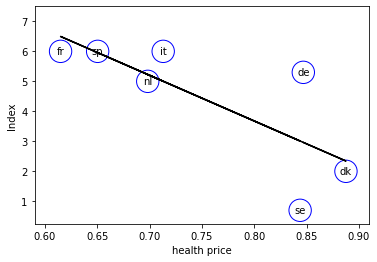

In [18]:
plt.figure()
plt.scatter(tabled['price'],tabled['comp'],facecolors='none', edgecolors='b',s=500.0)
plt.plot(tabled['price'], interceptc + slopec*tabled['price'], 'k')
plt.xlim(0.59,0.91)
plt.ylim(0.25,7.5)
plt.xlabel('health price')
plt.ylabel('Index')
for x,y,z in zip(tabled['price'],tabled['comp'],countries):
    plt.annotate(z,xy=(x, y),horizontalalignment='center', verticalalignment='center')


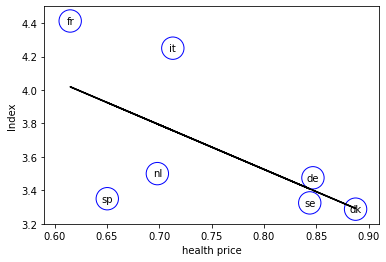

In [19]:
plt.scatter(tabled['price'],tabled['regu'],facecolors='none', edgecolors='b',s=500.0)
plt.plot(tabled['price'], interceptr + sloper*tabled['price'], 'k')
plt.xlabel('health price')
plt.ylabel('Index')
plt.xlim(0.59,0.91)
plt.ylim(3.2,4.5)
for x,y,z in zip(tabled['price'],tabled['regu'],countries):
    plt.annotate(z,xy=(x, y),horizontalalignment='center', verticalalignment='center')


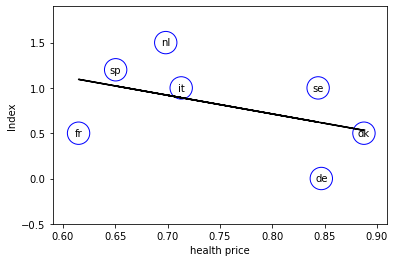

In [20]:
plt.scatter(tabled['price'],tabled['quali'],facecolors='none', edgecolors='b',s=500.0)
plt.plot(tabled['price'], interceptq + slopeq*tabled['price'], 'k')
plt.xlabel('health price')
plt.ylabel('Index')
plt.xlim(0.59,0.91)
plt.ylim(-0.5,1.9)
for x,y,z in zip(tabled['price'],tabled['quali'],countries):
    plt.annotate(z,xy=(x, y),horizontalalignment='center', verticalalignment='center')
